In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def get_csv(epoch):
    return pd.read_csv(f'outputs++/batches_permutations_model=BasicConv(in_channels=1, out_classes=2)_epoch={epoch}.csv')

In [3]:
N_EPOCHS = 13
dfs = [get_csv(e) for e in range(N_EPOCHS)]

In [4]:
for e in range(N_EPOCHS):
    dfs[e] = dfs[e].rename(columns={
        'FinalBatches': f'Epoch{e}Batches',
        'FinalBatchesIndexes': f'FinalBatchesIndexes_{e}',
        'FinalPermutationIndex': f'FinalPermutationIndex_{e}',
        'TestLoss': f'TestLoss_{e}',
        'TestCorrect': f'TestCorrect_{e}',
        'TestTotal': f'TestTotal_{e}',
        'TestAcc': f'TestAcc_{e}',
    })

In [5]:
merged = [dfs[0]]
for e in range(1, N_EPOCHS):
    new_merged = merged[e - 1].merge(dfs[e], how='inner', on=[f'Epoch{prev_epoch}Batches' for prev_epoch in range(e)])
    merged.append(new_merged)

In [48]:
def correlations(from_column, to_column, method='pearson'):
    print(f'Pearson correlation coefficients from column {from_column} to {to_column}:')
    for epoch in range(1, N_EPOCHS):
        also_check_against_same_epoch = 1 if from_column != to_column else 0
        for prev_epoch in range(0, epoch + also_check_against_same_epoch):
            m = merged[epoch]
            corr = m[f'{from_column}_{prev_epoch}'].corr(m[f'{to_column}_{epoch}'])
            print(f'{prev_epoch} -> {epoch}: {corr}')

In [ ]:
correlations('TestLoss', 'TestLoss')

In [ ]:
correlations('TestLoss', 'TestAcc')

In [43]:
correlations('TestAcc', 'TestAcc')

Pearson correlation coefficients from column TestAcc to TestAcc:
0 -> 1: -0.7180258968952054
1 -> 2: -0.35723846089139905
2 -> 3: -0.08864235299323987
3 -> 4: -0.5297915063552419
4 -> 5: -0.0328346368811461
5 -> 6: 0.07714900555535345
6 -> 7: -0.2865570504367494
7 -> 8: -0.1391479256527274
8 -> 9: 0.41918182673286025
9 -> 10: 0.3085956934515199
10 -> 11: -0.07195769622437861
11 -> 12: 0.12352000893103722


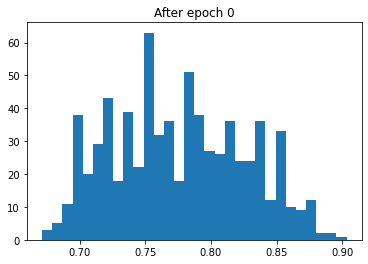

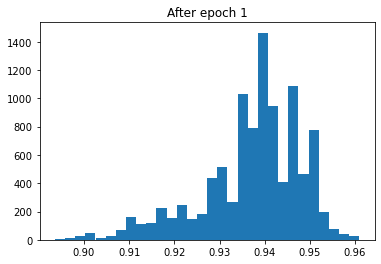

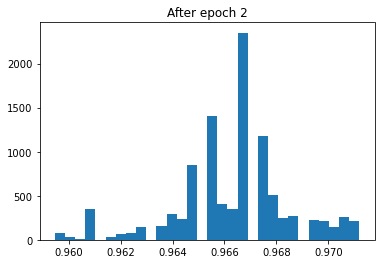

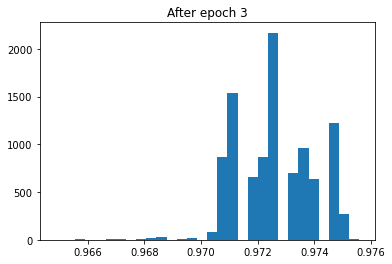

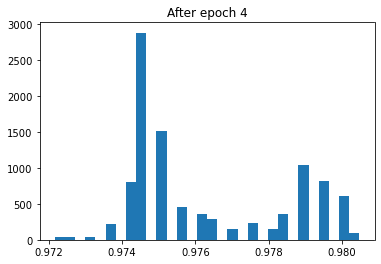

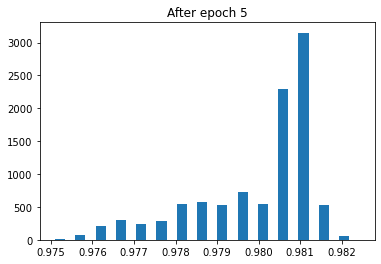

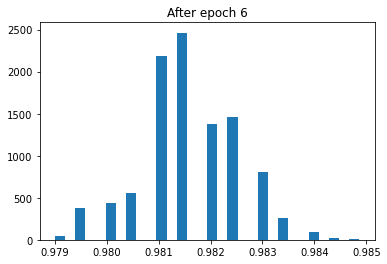

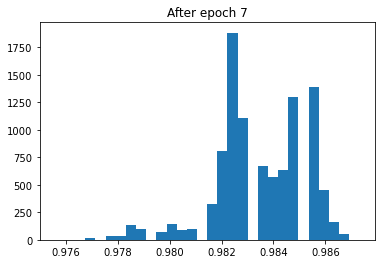

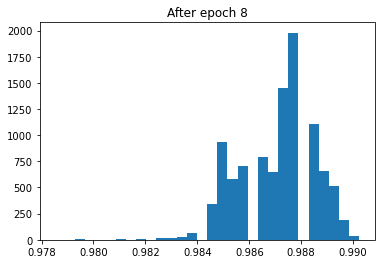

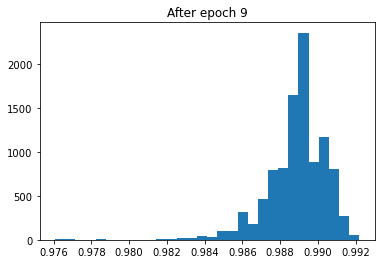

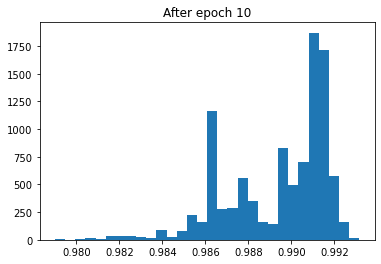

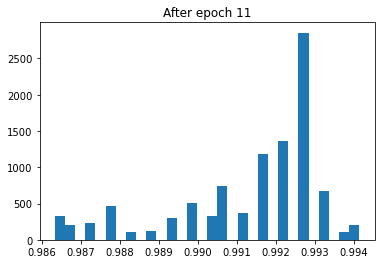

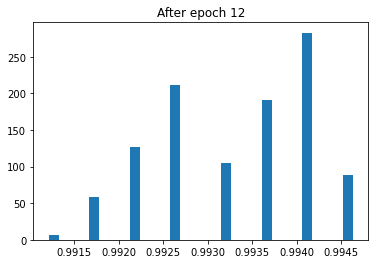

In [40]:
%matplotlib inline

for i in range(N_EPOCHS):
    plt.title(f'After epoch {i}')
    plt.hist(merged[i][f'TestAcc_{i}'], bins=30)
    plt.show()

In [53]:
means = [dfs[i][f'TestAcc_{i}'].mean() for i in range(N_EPOCHS)]
meds  = [dfs[i][f'TestAcc_{i}'].median() for i in range(N_EPOCHS)]
maxs  = [dfs[i][f'TestAcc_{i}'].max() for i in range(N_EPOCHS)]
mins  = [dfs[i][f'TestAcc_{i}'].min() for i in range(N_EPOCHS)]

In [54]:
for mn, md, mean, mx in zip(mins, meds, means, maxs):
    print(mn, md, mean, mx)

0.67138671875 0.77197265625 0.7755398220486112 0.9033203125
0.8935546875 0.939453125 0.937208726671007 0.9609375
0.95947265625 0.966796875 0.9663064139229911 0.97119140625
0.96484375 0.97265625 0.9726129441034226 0.9755859375
0.97216796875 0.97509765625 0.9762707907056052 0.98046875
0.97509765625 0.98046875 0.9798473539806548 0.982421875
0.97900390625 0.9814453125 0.98154296875 0.98486328125
0.9755859375 0.9833984375 0.9834171355716765 0.9873046875
0.978515625 0.9873046875 0.9870466928633432 0.990234375
0.97607421875 0.9892578125 0.9888883560422868 0.9921875
0.97900390625 0.99072265625 0.9895095582992312 0.9931640625
0.986328125 0.9921875 0.9912748790922619 0.994140625
0.9912109375 0.99365234375 0.9933253046291978 0.99462890625


In [63]:
for i in range(N_EPOCHS):
    best_prev_vs_med = i
    best_prev_vs_min = i
    best_prev_vs_avg = i
    for prev in range(i - 1, 0, -1):
        if maxs[prev] >= mins[i]:
            best_prev_vs_min = prev
        if maxs[prev] >= meds[i]:
            best_prev_vs_med = prev
        if maxs[prev] >= means[i]:
            best_prev_vs_avg = prev
#     if best_prev_vs_med != i:
#         print(f'best_prev_vs_med({i}) = {i - best_prev_vs_med}')
#     if best_prev_vs_avg != i:
#         print(f'best_prev_vs_avg({i}) = {i - best_prev_vs_avg}')
    if best_prev_vs_min != i:
        print(f'best_prev_vs_min({i}) = {i - best_prev_vs_min}')

best_prev_vs_min(2) = 1
best_prev_vs_min(3) = 1
best_prev_vs_min(4) = 1
best_prev_vs_min(5) = 2
best_prev_vs_min(6) = 2
best_prev_vs_min(7) = 4
best_prev_vs_min(8) = 4
best_prev_vs_min(9) = 5
best_prev_vs_min(10) = 6
best_prev_vs_min(11) = 4
best_prev_vs_min(12) = 3
